In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("file:///F:/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df=df.fillna(0)

In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
#Converting this date tiem column to its correct type otherwise it shall be counted in categorical features and mess with the visualisations
df['reservation_status_date'] = df['reservation_status_date'].astype('datetime64')

In [11]:
#Separating categorical columns in a list for the ease of visualising charts for categorical variables
categoricals = [i for i in df.columns if df.dtypes[i] == 'object']
#Separating numerical columns in a list for the ease of visualising charts for numerical variables
numericals = [i for i in df.columns if df.dtypes[i] != 'object']

In [12]:
print("Categorical Columns are: ", *categoricals, sep = '\n')
print("\n")
print("\n")
print("Numerical Columns are: ", *numericals, sep = '\n')

Categorical Columns are: 
hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
deposit_type
customer_type
reservation_status




Numerical Columns are: 
is_canceled
lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
agent
company
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests
reservation_status_date


In [13]:
#Visualising categories of the Categorical columns
for i in categoricals:
    print(("{} : {} Total nunique = {} \n").format(i, df[i].unique(), df[i].nunique()))

hotel : ['Resort Hotel' 'City Hotel'] Total nunique = 2 

arrival_date_month : ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] Total nunique = 12 

meal : ['BB' 'FB' 'HB' 'SC' 'Undefined'] Total nunique = 5 

country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 0 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'IS

In [14]:
#The color palette we shall be using. Although this is not the best one for this dataset but I am using it here. Will cahnge later
sns.color_palette("Set2", 8)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

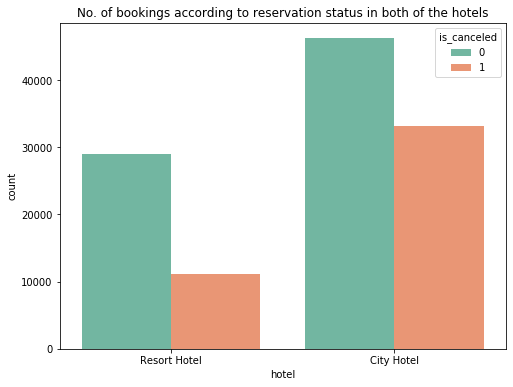

In [15]:
sns.set_palette('Set2')
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df, hue = 'is_canceled')
plt.title("No. of bookings according to reservation status in both of the hotels")
plt.show()

In [16]:
df.groupby(['hotel'])['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: is_canceled, dtype: int64

In [17]:
df.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64

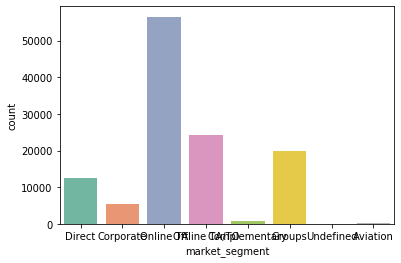

In [18]:
sns.countplot(x = 'market_segment', data = df)

plt.show()

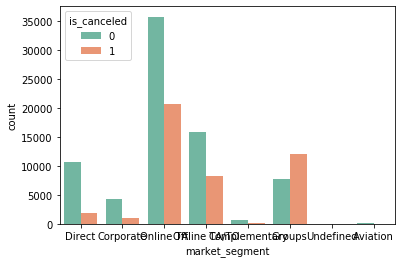

In [19]:
sns.countplot(x = 'market_segment', data = df, hue = 'is_canceled')

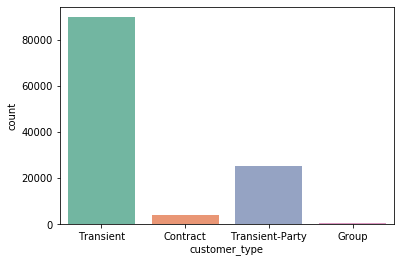

In [20]:
sns.countplot(x = 'customer_type', data = df)

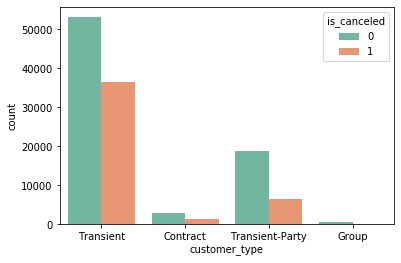

In [21]:
sns.countplot(x = 'customer_type', data = df, hue = 'is_canceled')

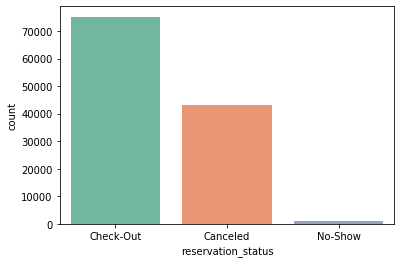

In [22]:
sns.countplot(x = 'reservation_status', data = df)

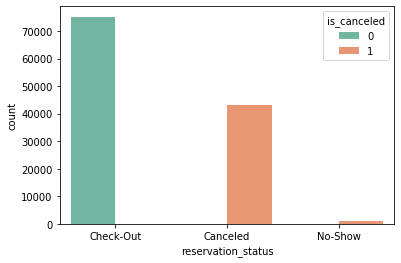

In [23]:
sns.countplot(x ='reservation_status', data = df, hue = 'is_canceled')

In [24]:
df.groupby(['arrival_date_year'])['is_canceled'].mean()

arrival_date_year
2015    0.370158
2016    0.358633
2017    0.386979
Name: is_canceled, dtype: float64

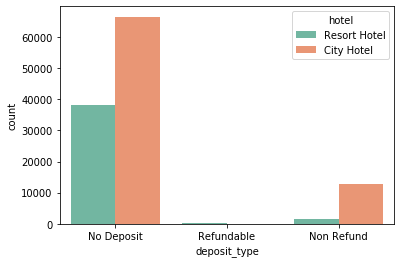

In [25]:
sns.countplot(x = 'deposit_type', data = df, hue = 'hotel')

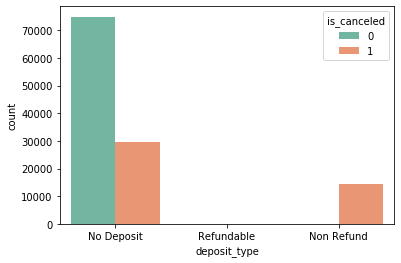

In [26]:
sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled')

In [27]:
order = ['January','February', 'March' ,'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December' ]

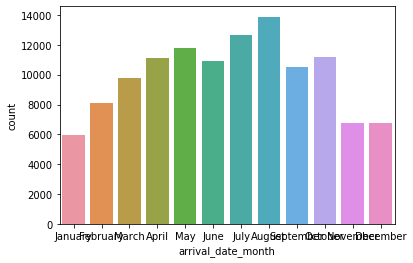

In [28]:
sns.countplot(x = 'arrival_date_month', data = df,order = order)

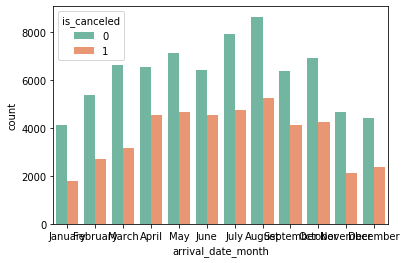

In [29]:
sns.countplot(x = 'arrival_date_month', data = df, hue = 'is_canceled', order = order)

In [30]:
df.groupby(['country'])['is_canceled'].agg( np.mean).sort_values(ascending = False).head(30)

country
KHM    1.000000
BEN    1.000000
GGY    1.000000
GLP    1.000000
HND    1.000000
IMN    1.000000
JEY    1.000000
MYT    1.000000
NIC    1.000000
FJI    1.000000
VGB    1.000000
UMI    1.000000
MAC    0.937500
HKG    0.896552
TJK    0.888889
ARE    0.843137
FRO    0.800000
BHR    0.800000
BGD    0.750000
MDV    0.750000
QAT    0.733333
SEN    0.727273
AND    0.714286
SAU    0.687500
IDN    0.685714
GEO    0.681818
PAK    0.642857
PHL    0.625000
NGA    0.617647
GIB    0.611111
Name: is_canceled, dtype: float64

In [31]:
mat = ['is_canceled',
 'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

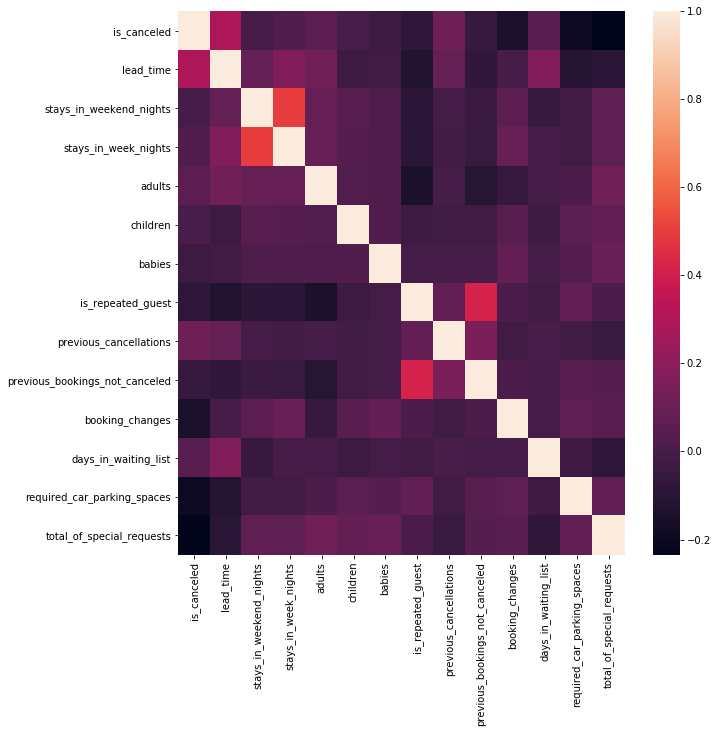

In [32]:
plt.figure(figsize = (10,10))
cormat = df[mat].corr()
sns.heatmap(cormat)

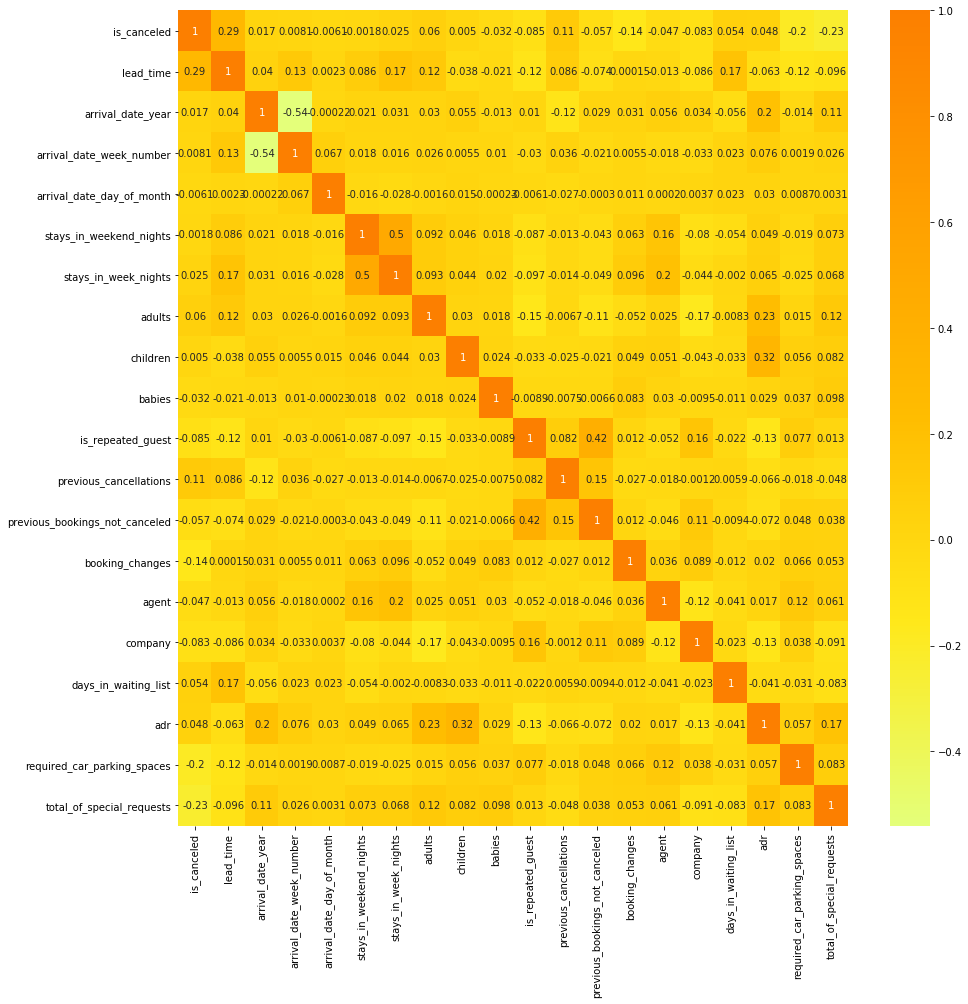

In [33]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True,cmap='Wistia')

In [34]:
cancel_correlation_array = df.corr()['is_canceled']
cancel_correlation_array.abs().sort_values(ascending = False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [35]:
cat  = ['is_canceled',
    'lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
'previous_bookings_not_canceled',
         'required_car_parking_spaces',
 'total_of_special_requests'
]

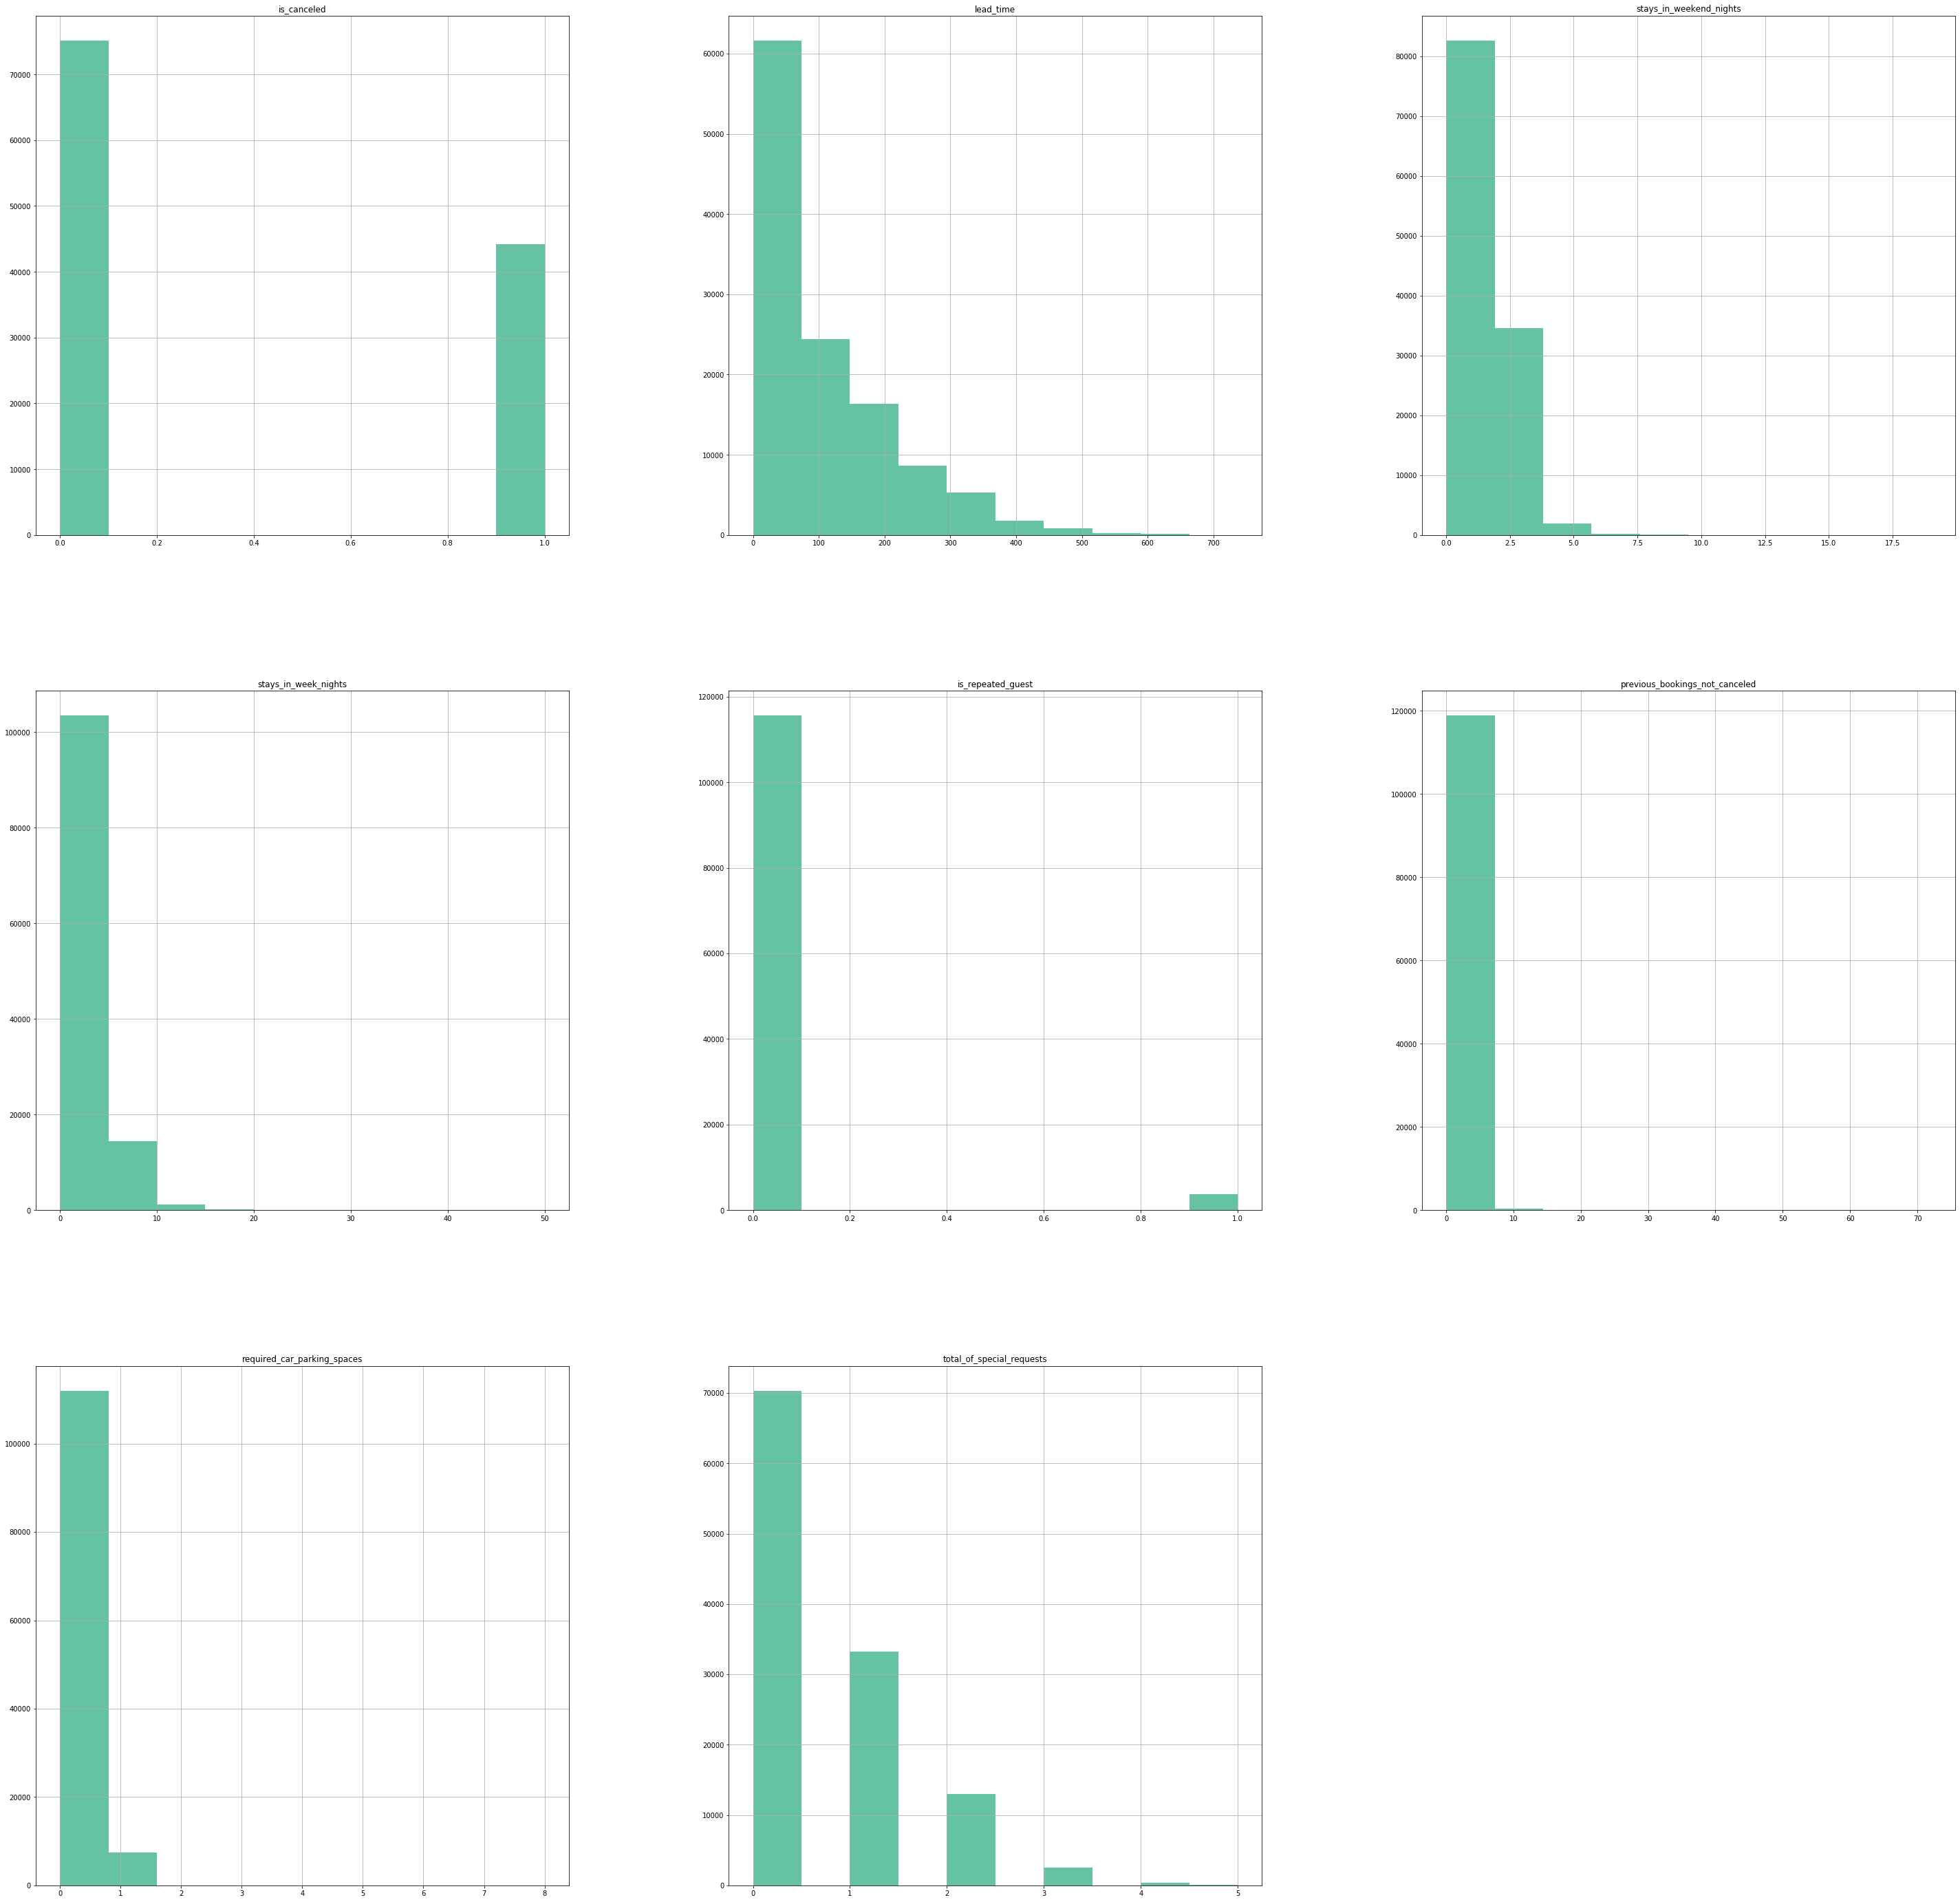

In [36]:
df[cat].hist(figsize=(50,50))
plt.show()

In [37]:
plot_list = ['lead_time',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
'previous_bookings_not_canceled',
         'required_car_parking_spaces',
 'total_of_special_requests']

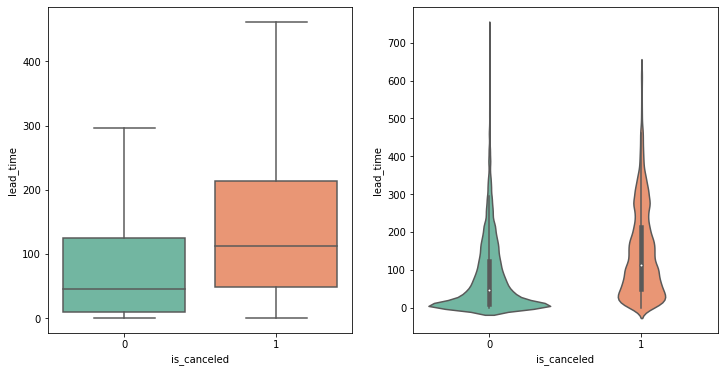

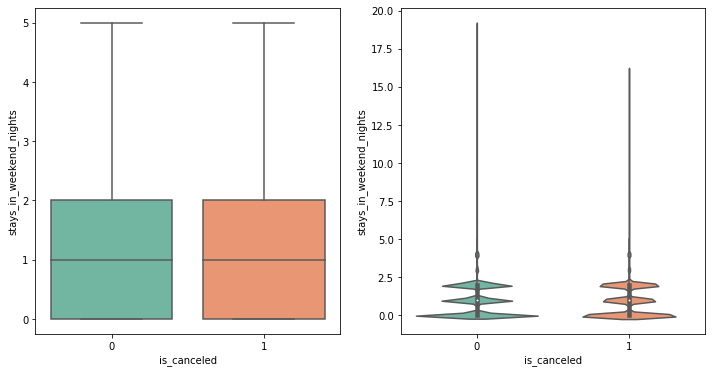

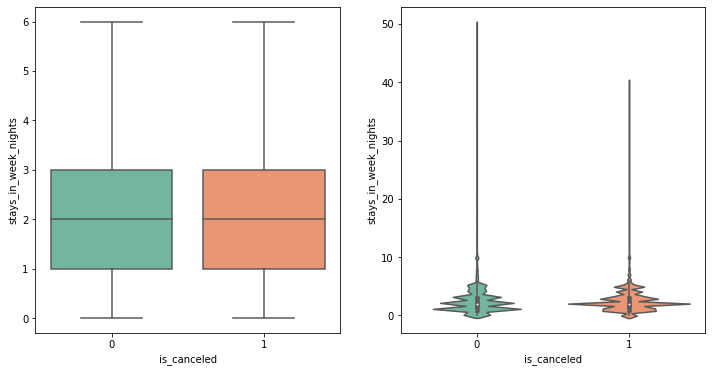

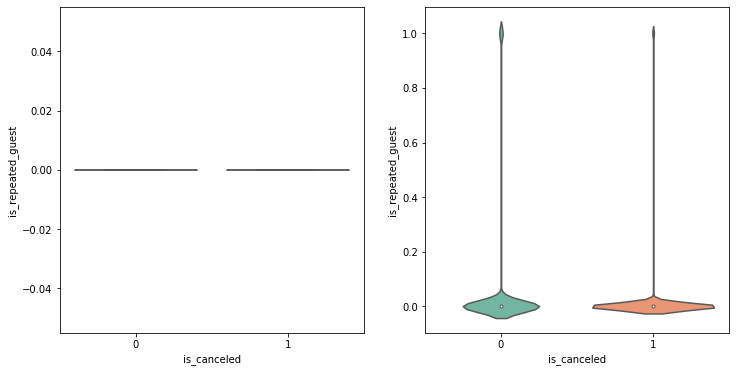

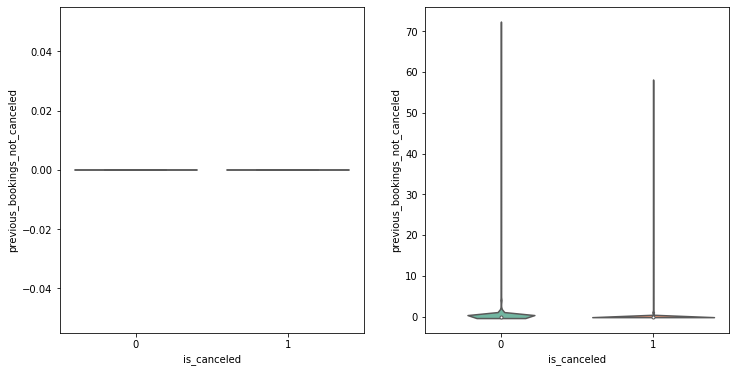

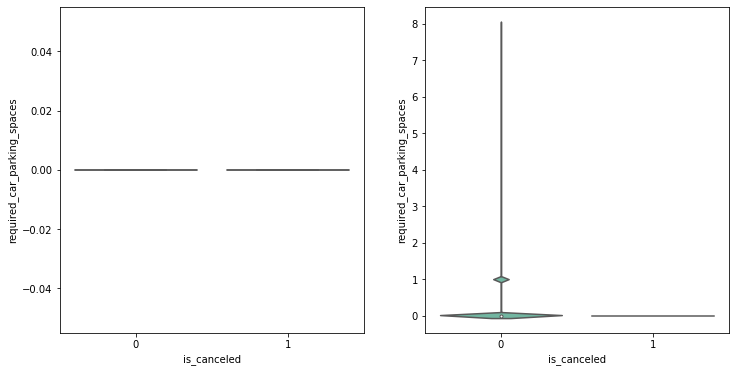

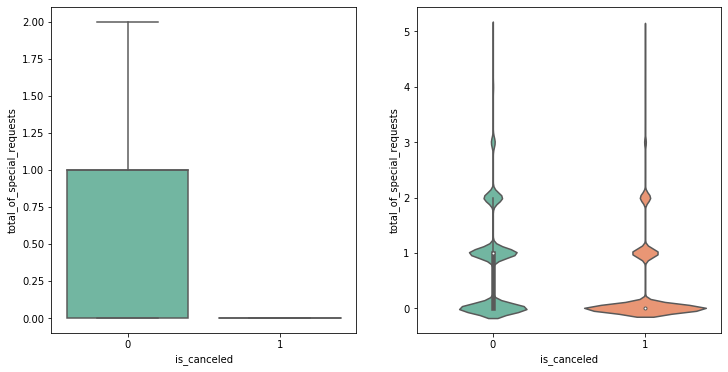

In [38]:
for i in plot_list:
    _, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,6))
    sns.boxplot(x = 'is_canceled', y = i, data = df, showfliers = False, ax = ax[0])
    sns.violinplot(x = 'is_canceled', y = i, data = df, showfliers = False, ax = ax[1])
    
    plt.show()


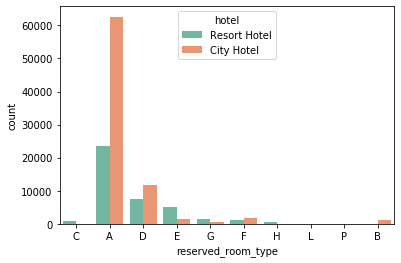

In [39]:
sns.countplot(x = 'reserved_room_type', hue = 'hotel', data = df)
plt.show()

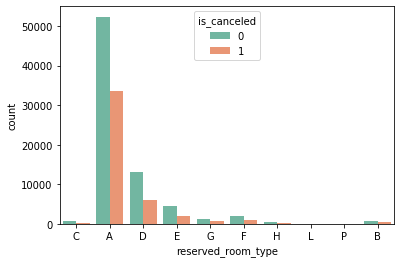

In [40]:
sns.countplot(x = 'reserved_room_type', hue = 'is_canceled', data = df)

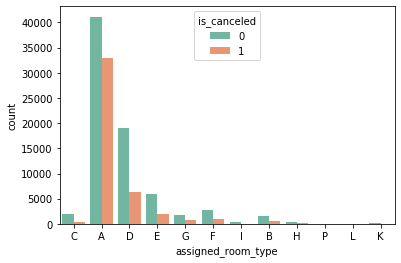

In [41]:
sns.countplot(x = 'assigned_room_type', hue = 'is_canceled', data = df)

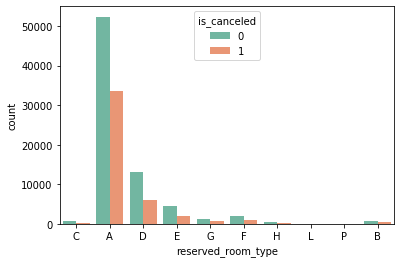

In [42]:
sns.countplot(x = 'reserved_room_type', data = df, hue = 'is_canceled')

In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [44]:
df.drop(['reservation_status', 
'reservation_status_date' , 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1, inplace = True)
df.shape

(119390, 26)

In [45]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [46]:
df1 = df.copy()

In [47]:
hotel = {'Resort Hotel': 0, 'City Hotel' : 1}

In [48]:
df1['hotel'] = df1['hotel'].map(hotel)

In [49]:
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type'], drop_first = True)

In [50]:
le = LabelEncoder()

In [51]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,country,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,342,2015,1,0,2,0.0,0,PRT,...,0,0,0,0,0,0,1,0,0,0
1,0,0,737,2015,1,0,2,0.0,0,PRT,...,0,0,0,0,0,0,1,0,0,0
2,0,0,7,2015,1,1,1,0.0,0,GBR,...,0,0,0,0,0,0,1,0,0,0
3,0,0,13,2015,1,1,1,0.0,0,GBR,...,0,0,0,0,0,0,1,0,0,0
4,0,0,14,2015,1,2,2,0.0,0,GBR,...,0,0,0,0,0,0,1,0,0,0


In [52]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'country', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'distribution_channel_Undefined',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H',

In [57]:
df1=df1.drop(['country'],axis='columns')

In [58]:
x = df1.drop('is_canceled', axis = 1)
y = df1['is_canceled']

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [61]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pre_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pre_lo)
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7727336181143033

In [62]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     22492
           1       0.74      0.60      0.66     13325

    accuracy                           0.77     35817
   macro avg       0.76      0.74      0.75     35817
weighted avg       0.77      0.77      0.77     35817



In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)
pre_knc=knc.predict(xtest)
accu_knc=accuracy_score(ytest,pre_knc)
accu_knc

0.7637713934723734

In [65]:
print(classification_report(ytest,pre_lo))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     22492
           1       0.74      0.60      0.66     13325

    accuracy                           0.77     35817
   macro avg       0.76      0.74      0.75     35817
weighted avg       0.77      0.77      0.77     35817



In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
pre_rfc=rfc.predict(xtest)
accu_rfc=accuracy_score(ytest,pre_rfc)
accu_rfc

0.8619091492866516

In [68]:
print(classification_report(ytest,pre_rfc))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22492
           1       0.85      0.76      0.80     13325

    accuracy                           0.86     35817
   macro avg       0.86      0.84      0.85     35817
weighted avg       0.86      0.86      0.86     35817



In [71]:
models = pd.DataFrame({
    'Model': ['Logistic','knc',  ' Random Forest Classifier'
             ],
    'Score': [ accu_lo,accu_knc, accu_rfc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Random Forest Classifier,0.861909
0,Logistic,0.772734
1,knc,0.763771


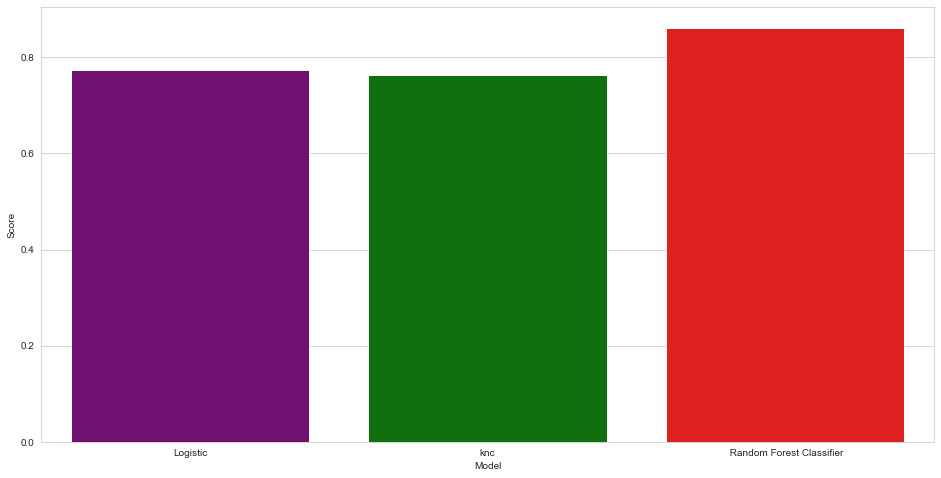

In [73]:
colors = ["purple", "green", "red", "magenta","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()